Text(0, 0.5, 'Water Drinks (Litre)')

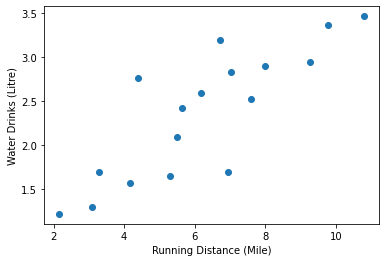

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Running Distance in Mile
x = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Water Drinks in Litre
y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

plt.scatter(x, y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

In [4]:
# now, we'll use sklearn to make the regression line for us!
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()

lr_reg.fit(x.reshape(-1, 1), y.reshape(-1, 1))

print(lr_reg.coef_)

print(lr_reg.intercept_)

[[0.25163494]]
[0.79880123]


In [14]:
# finding MSE with sklearn
from sklearn.metrics import mean_squared_error, r2_score
    
y_predicted = list(map(lambda x: 0.25163494*x + 0.79880123, x))
mean_squared_error(y, y_predicted)

0.15385767404191164

0.15385767404191164


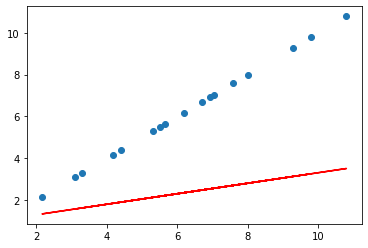

In [23]:
# finding MSE without sklearn
# summed = 0for y_predicted, y_actual in zip(predicted, Y): summed += (y_predicted - y_actual)**2summed = summed / len(Y)
y_predicted = list(map(lambda x: 0.25163494*x + 0.79880123, x))
plt.scatter(x, x)
plt.plot(x, y_predicted ,'r')
error = sum([ (i-j)**2 for i, j in zip(y, y_predicted) ]) / len(y)
print(error)


In [15]:
# doing it by hand 
slope = lr_reg.coef_
slope = lr_reg.intercept_

In [16]:
ss_reg = y_predicted - np.mean(y)

In [17]:
r2_score(y, y_predicted)

0.6928760302783591

In [24]:
# OK! So how much would a company's sales be, based upon product advertisements?
import pandas as pd
df = pd.read_csv('Datasets/Advertising.csv')

In [31]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [27]:
'''
Activity: How much companies' sales would be based on their product advertisement?
We have a dataset of 200 companies, comprised of the top 150 companies, and the bottom 50 companies.

The top companies (150) spent money to advertise their product on TV, radio and newspaper

Based on their advertisments, they have calculated the sale that they had

For the bottom companies (50), they want to have an estimation for the following: if they spend X dollar, Y dollar and Z dollar on TV, radio and newspaper, respectively, how much would their predicted sales be?

We will use the top 150 companies in our dataset to train the model, and the bottom 50 companies to check that the model is working correctly

In your group of 3, use the Advertising dataset and the starter code below to get started:
'''
# import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

feature_cols = ["TV", "radio", "newspaper"]

# Use the top 150 companies to train the Linear Regression Model
X_train = df[feature_cols][:150]
Y_train = df.sales[:150]  # or could also write Y_train = df.["sales"][:150]

In [29]:
# TODO: Instantiate the model (Linear Regression) and train it
print("Generating a linear regression on the top 150 companies (first one)")
sales_reg = LinearRegression()
sales_reg.fit(X_train, Y_train)

print("Printing the coefficient and y intercept of our first 150 sales")
print(sales_reg.coef_)
print(sales_reg.intercept_)

Generating a linear regression on the top 150 companies (first one)
Printing the coefficient and y intercept of our first 150 sales
[ 0.04700012  0.17993257 -0.00140273]
3.029766796293691


In [30]:
# TODO: Predict the botton 50 companies' sales
X_test = df[feature_cols][-50:]
Y_test = df.sales[-50:]
print("Predicting the sales of the bottom 50 companies (last ones)")
print(sales_reg.predict(X_test))

print(sales_reg.score(X_test, Y_test))
print(r2_score(Y_test, sales_reg.predict(X_test)))

Predicting the sales of the bottom 50 companies (last ones)
[18.67186188 10.15990172 16.48950045 18.17132726 15.63964047  5.30168953
 15.19930681 10.27021058 10.15577653 12.48190724 14.35100299 13.43010832
 15.10545883 17.32542469 11.17561481 14.54411372 10.60623457 13.6578278
 17.31920373 18.29020846  7.44118029 14.4553876   7.54376735 12.20415315
 14.07598825 24.7841683  20.11008458 12.38328494 16.41529992 12.58762415
 10.84616747 14.23249384  6.65512798 24.18338541 18.74887883 20.75225663
  9.92682913 17.15002463 18.96767352  6.05302918 12.27336433  8.51313117
  4.53156602 18.42150484 16.46286778  5.47156415  8.32748549 13.01318332
 23.82330766 15.4737108 ]
0.8963519785440216
0.8963519785440216


In [35]:
# sales_reg.predict([[100], [100], [20]])

sales_reg.predict([[100, 100, 20]])

array([25.69498118])

In [36]:
# R squared of the model
from sklearn.metrics import r2_score
r2_score(Y_test, sales_reg.predict(X_test))

0.8963519785440216